## Adding the directory of the package to the system path

In [1]:
from config import *
append_path('../../')

## Import statements

In [2]:
import numpy as np
import pandas as pd
from m_learn.clustering import KMeans
from m_learn.utility.data_preprocessing import mesh_data
import matplotlib
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Making blobs having spaced centers

### Creating the data

In [3]:
# centers of the two dimensional blobs
centers = [[-1,2],[0.5, 0.5], [3.5, 0.5], [2, 2], [0.5, 3.5], [3.5, 3.5], [5, 2]]
# creating the blob data
X, y = make_blobs(n_samples= 1000, n_features = 2, centers = centers, cluster_std = 0.30, random_state=5)

In [4]:
# storing the blob data
data = pd.DataFrame({"x": X[:,0], "y": X[:,1], "output": y })

In [5]:
# head of the data
data.head()

output         x         y
0       5  3.111026  3.998880
1       1  0.085900  1.130533
2       1  0.410192  0.710361
3       4 -0.064259  3.798884
4       0 -1.453354  2.193454

Extracting the data of the 7 classes

In [6]:
class0 = data[data["output"] == 0]
class1 = data[data["output"] == 1]
class2 = data[data["output"] == 2]
class3 = data[data["output"] == 3]
class4 = data[data["output"] == 4]
class5 = data[data["output"] == 5]
class6 = data[data["output"] == 6]

### Scatter plot of the data of seven classes

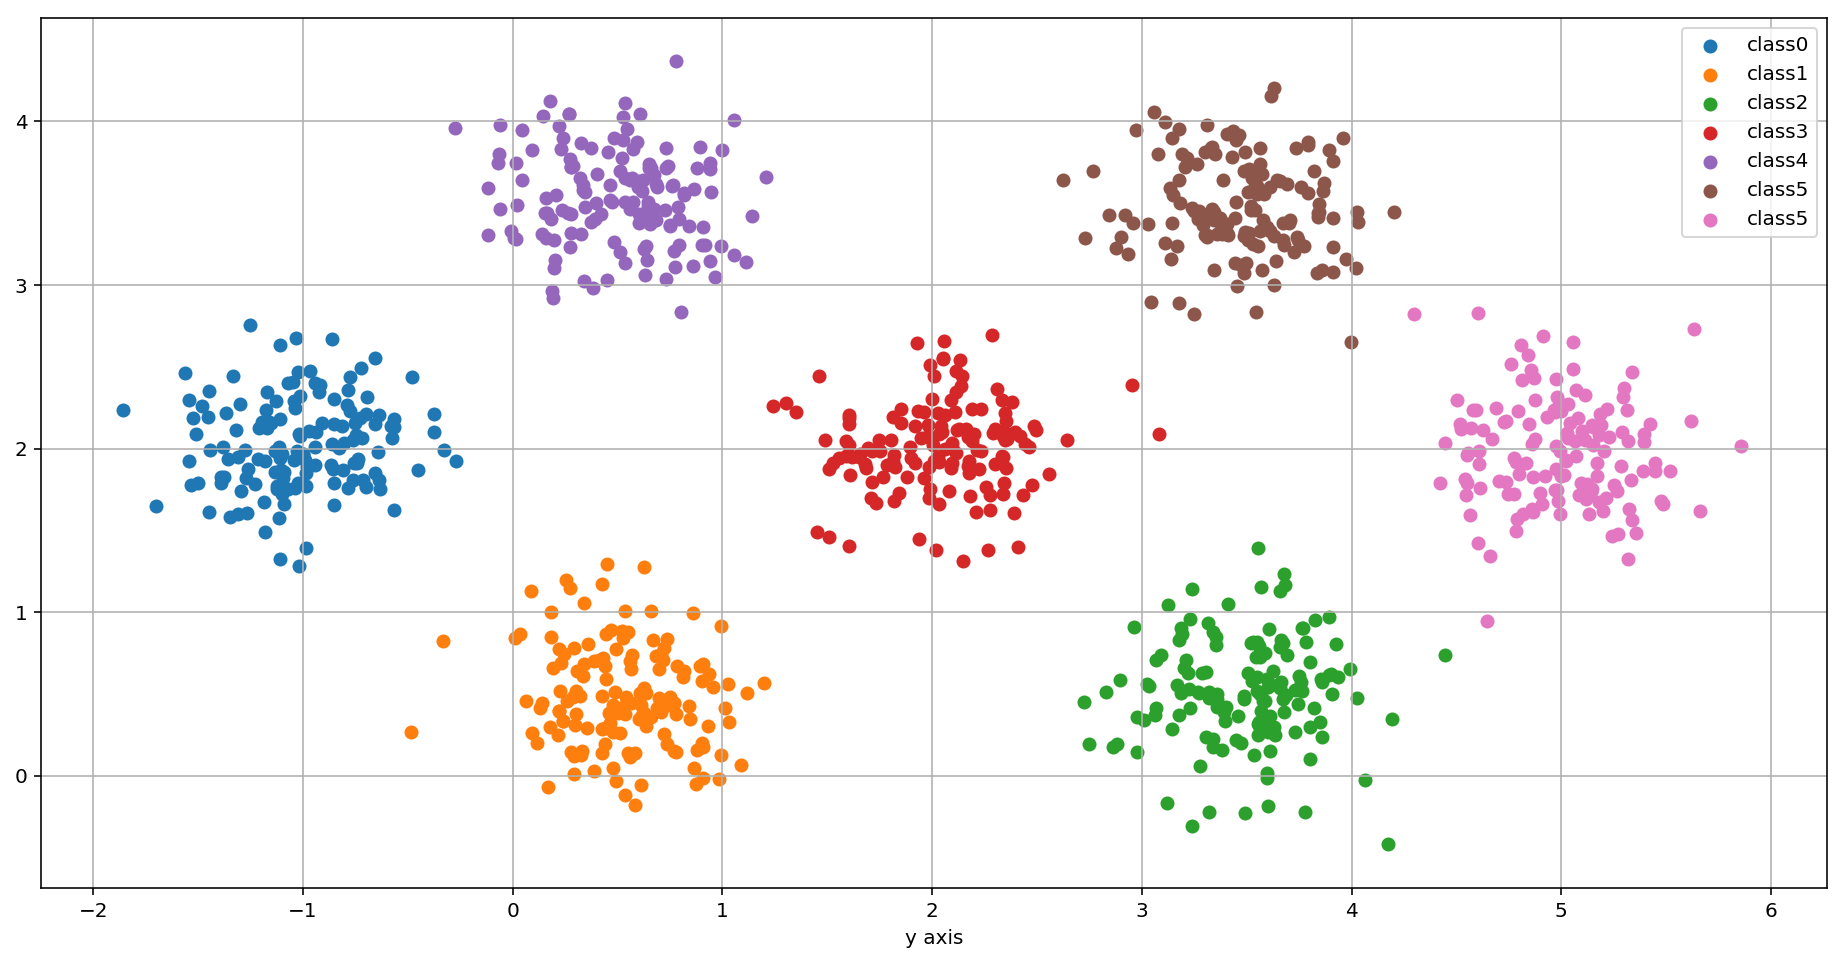

In [7]:
# scatter plot of the 3 classes
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
plt.scatter(class0["x"], class0["y"],  marker='o', label = 'class0')
plt.scatter(class1["x"], class1["y"],  marker='o', label = 'class1')
plt.scatter(class2["x"], class2["y"],  marker='o', label = 'class2')
plt.scatter(class3["x"], class3["y"],  marker='o', label = 'class3')
plt.scatter(class4["x"], class4["y"],  marker='o', label = 'class4')
plt.scatter(class5["x"], class5["y"],  marker='o', label = 'class5')
plt.scatter(class6["x"], class6["y"],  marker='o', label = 'class5')
plt.xlabel('x axis')
plt.xlabel('y axis')
plt.legend()
plt.grid()
plt.show()

# Visualation of clustering the data using different numbers of clusters

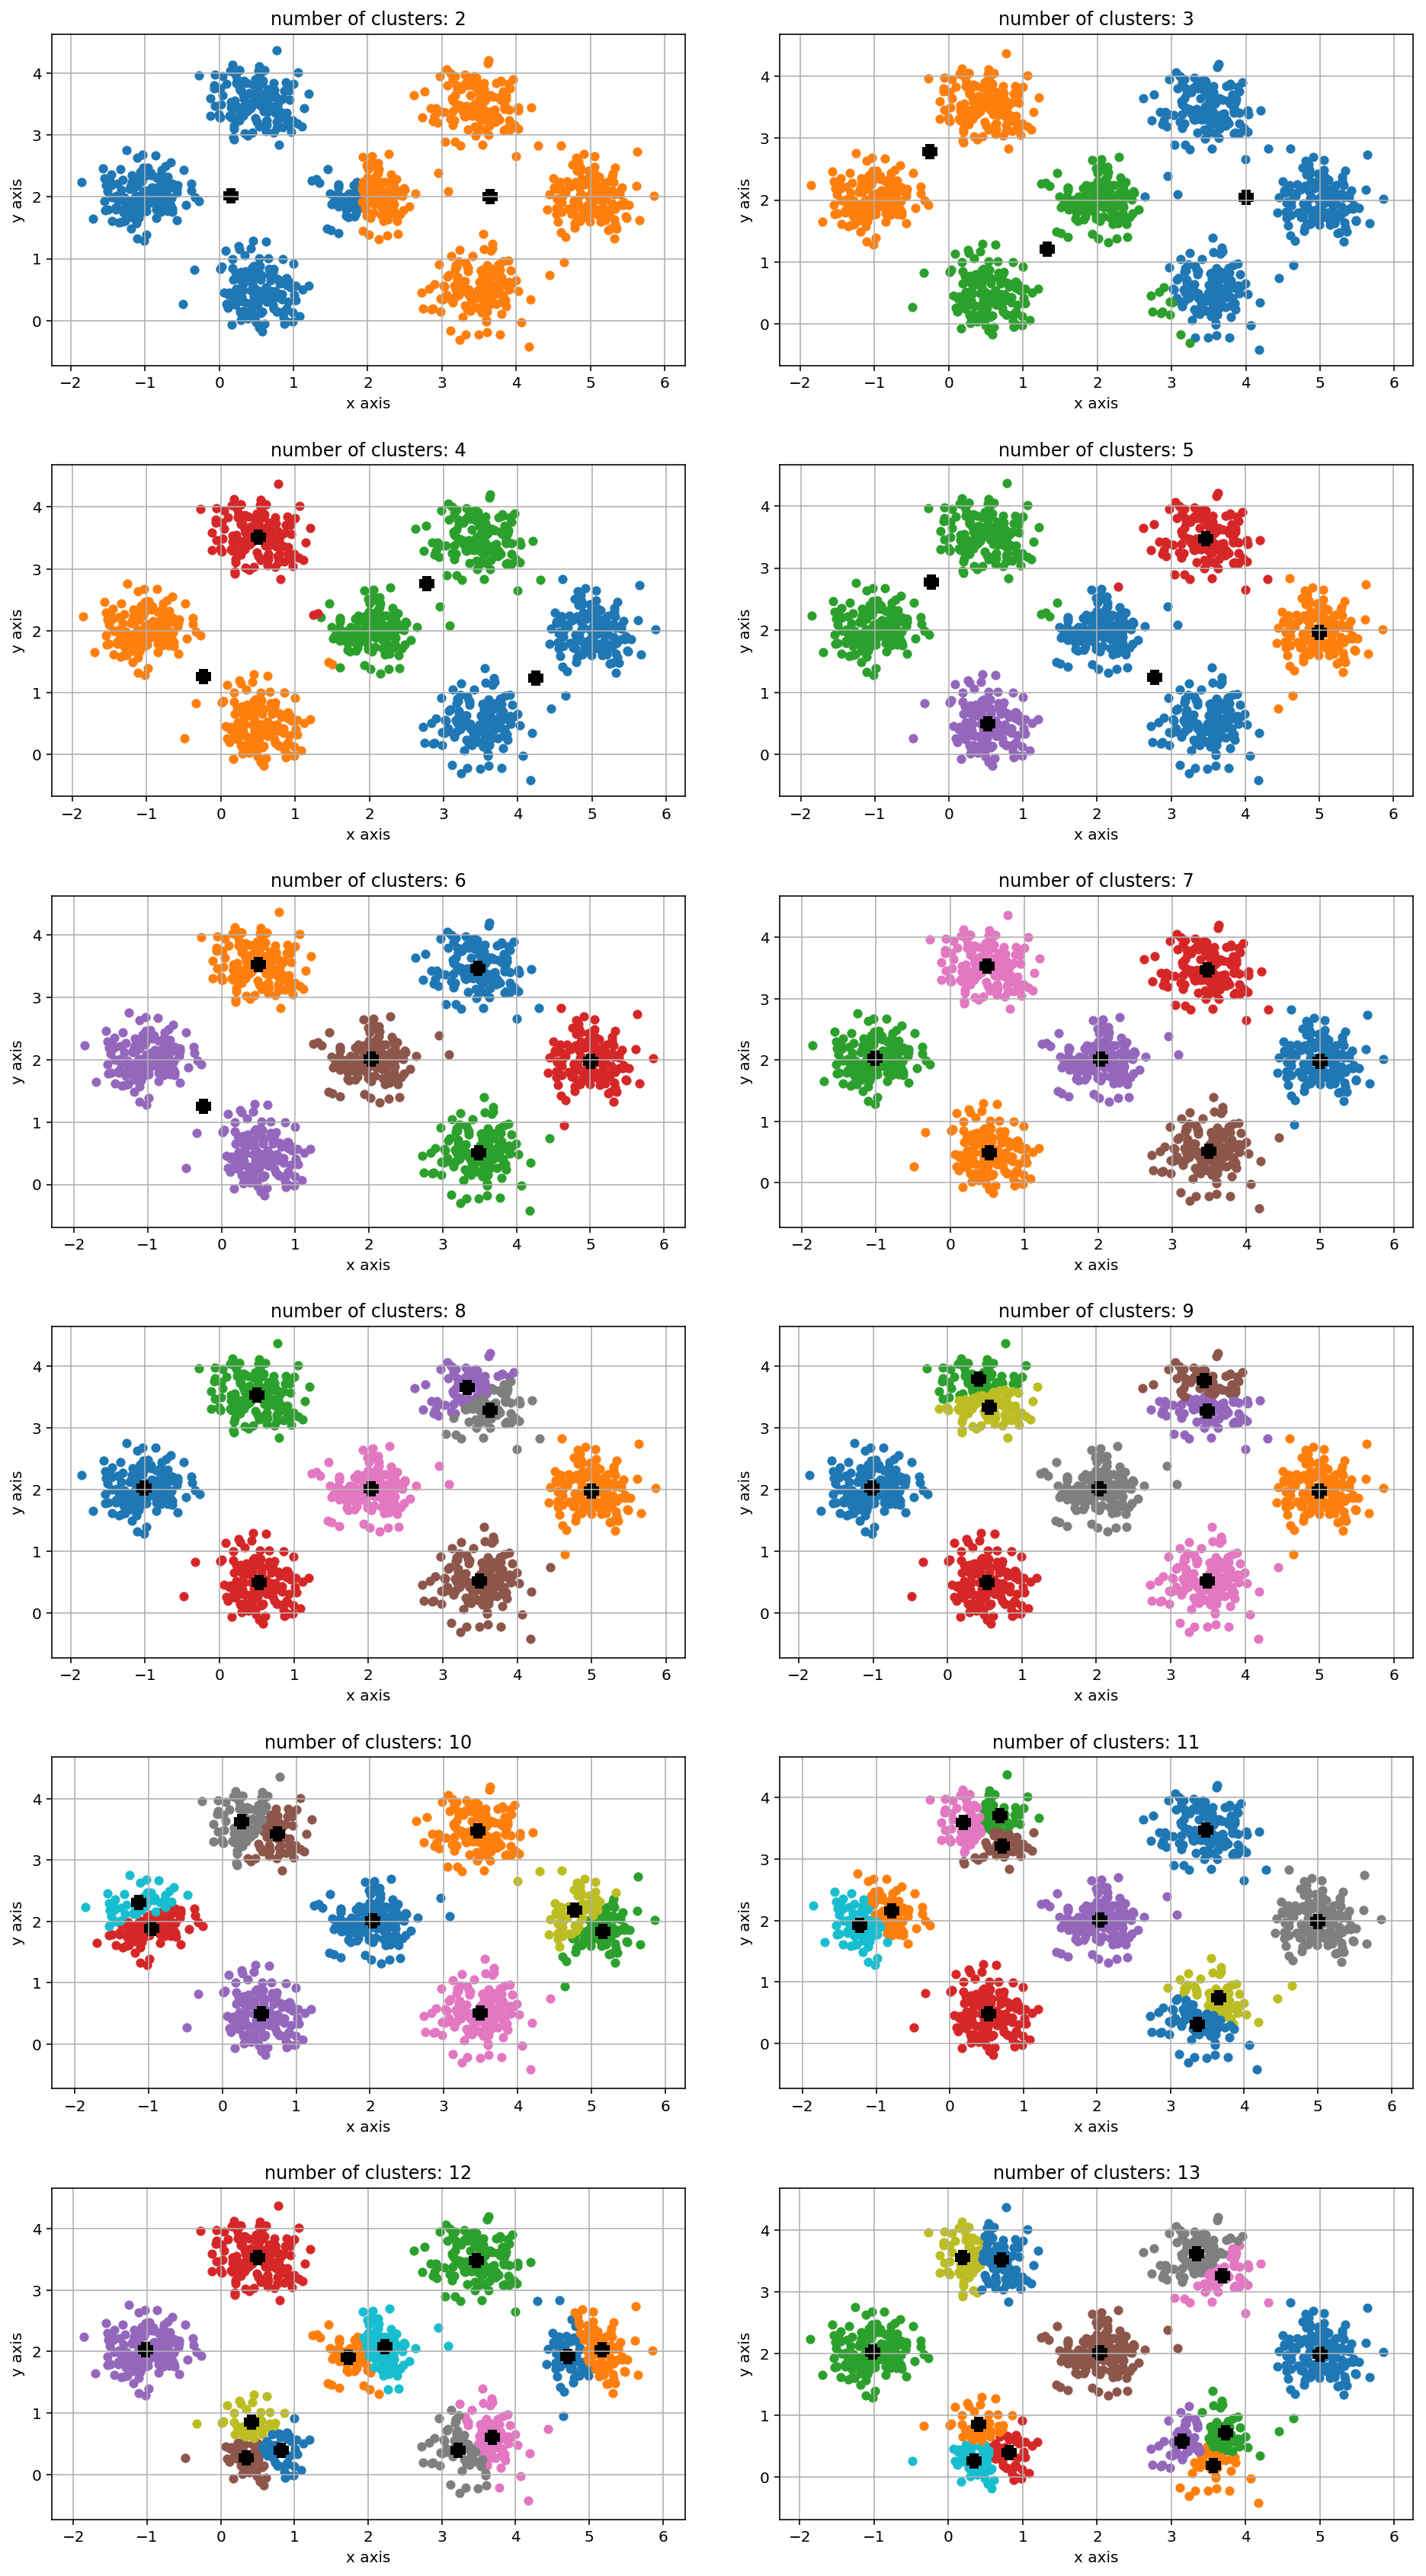

In [8]:
# set he matplotlib size
matplotlib.rcParams['figure.figsize'] = (16.0, 30.0)

# create a range of k values to try on
k_values = range(2,14)
# a list to store the final inertia value of the clustering experiments
inertia_values = []
# subplot dimension
subplot_dimension = [6,2]

# features of the model
features = ['x', 'y']
# max iteration of clustering
max_iter = 300

# iterate through each k value
for k in k_values:

    # create a k means model with k number of clusters
    model = KMeans(k = k)
    # fit the clusters
    model.fit(data, features, max_iter)
    # retrieve the final inertia of the model
    final_inertia = model.final_inertia
    # appending the inertia value to the designated list
    inertia_values.append(final_inertia)
    # retrieving the cluster assignments
    cluster_assignments = model.cluster_assignments

    # adding the subplot to the figure
    plt.subplot(subplot_dimension[0], subplot_dimension[1], k-1)
    
    # iterating through each cluster
    for i in range(k):
        # scatter plot of the cluster data
        plt.scatter(data[cluster_assignments == i]['x'], data[cluster_assignments == i]['y'], linewidths=0.1)
        # plot of the cluster centroid
        plt.scatter(model.centroids[i,0],model.centroids[i,1], linewidth = 10, c = 'k', marker="+")
     
    # title of the subplot
    title = "number of clusters: "+str(k)
    plt.title(title)
    # labels of the plot
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.grid()

# adjusting height and width space of the subplots
plt.subplots_adjust(wspace = 0.15, hspace = 0.30)
# showing the plot
plt.show()

# Plot of k values vs 

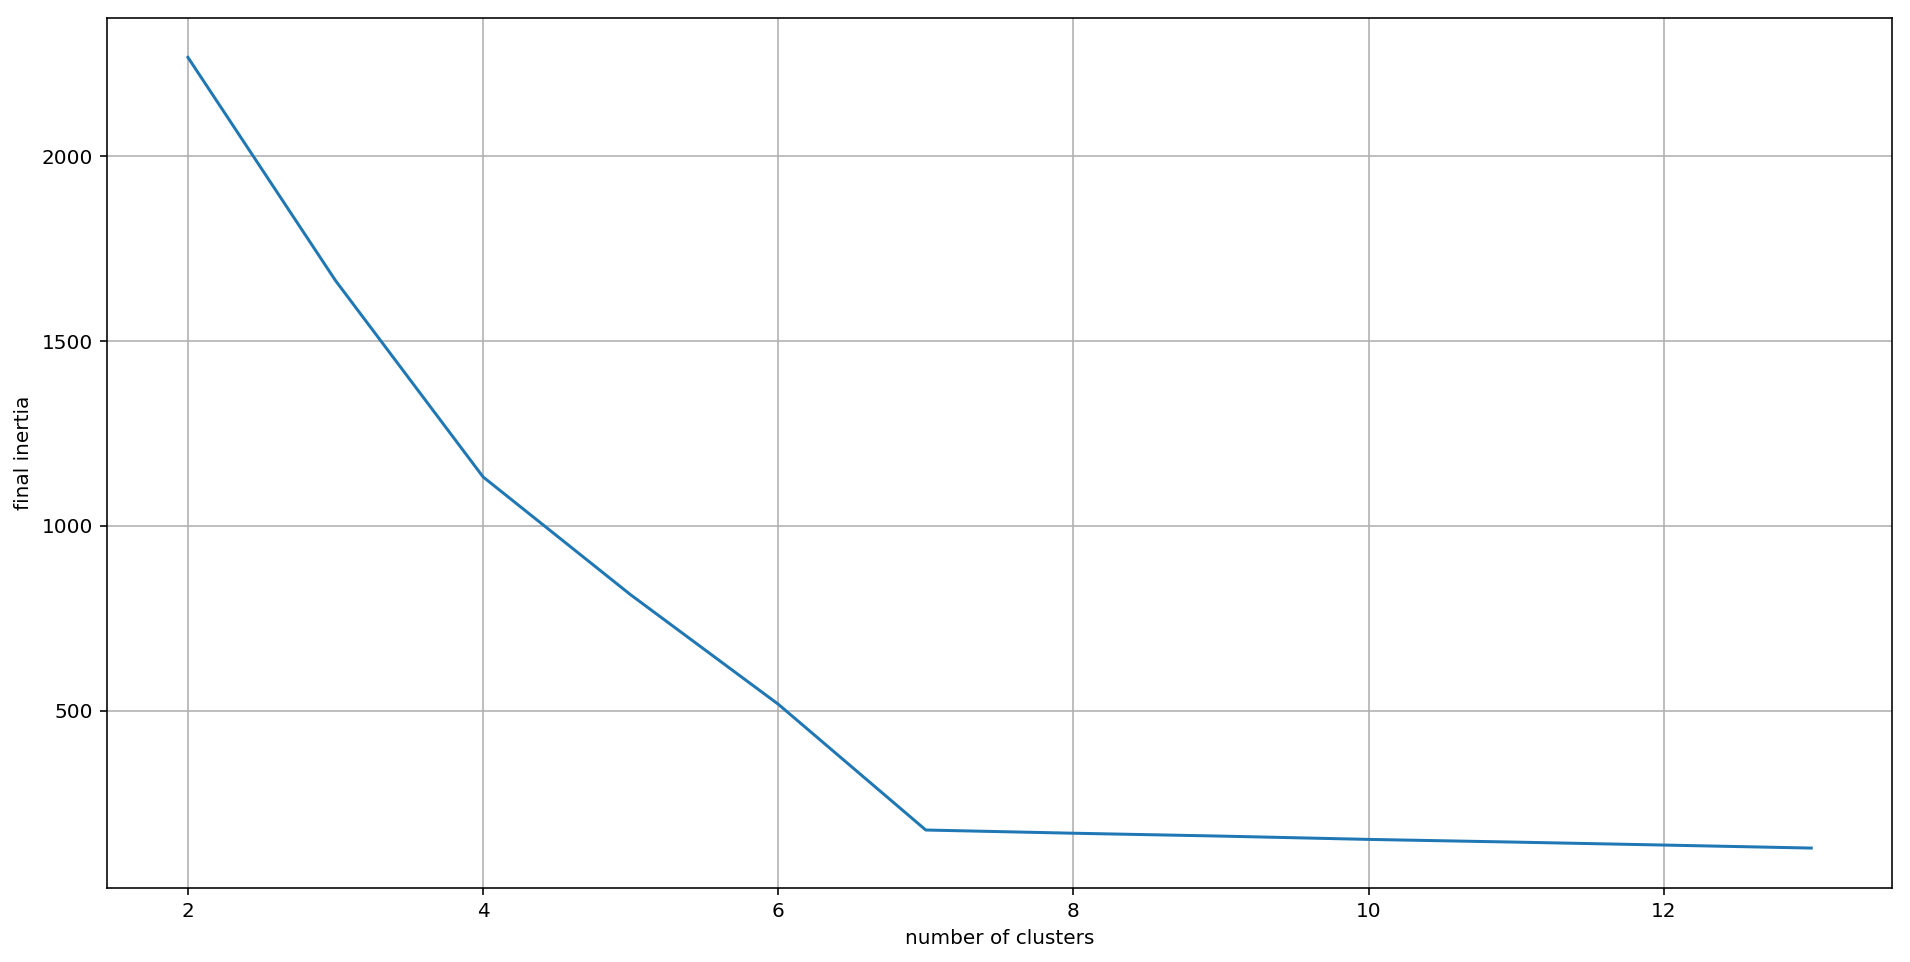

In [9]:
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
plt.plot(k_values, inertia_values)
plt.grid()
plt.xlabel('number of clusters')
plt.ylabel('final inertia')
plt.show()